In [807]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Data Selection & Cleaning

In [808]:
df_csv = pd.read_csv('measurements.csv')
df_excel = pd.read_excel('measurements2.xlsx', engine='openpyxl')

In [809]:
df_csv.equals(df_excel)

False

In [810]:
df_excel.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [811]:
df_csv.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [812]:
df = df_excel

In [813]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [814]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=True)

In [815]:
df.shape

(388, 12)

In [816]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [817]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill_liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [818]:
df['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [819]:
df.drop(['specials'], axis=1, inplace=True)

In [820]:
df.refill_gas.value_counts()

SP98    8
E10     5
Name: refill_gas, dtype: int64

In [821]:
df.drop(['refill_gas'], axis=1, inplace=True)

In [822]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
dtype: int64

In [823]:
df.drop(['refill_liters'], axis=1, inplace=True)

In [824]:
df.temp_inside.value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [825]:
round(np.mean(df['temp_inside']),1)

21.9

In [826]:
df['temp_inside'].fillna(round(np.mean(df['temp_inside']),1), inplace=True)

In [827]:
df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [828]:
df['e10'] = np.where(df['gas_type']=='E10', 1, 0)

In [829]:
df['e10'].value_counts()

0    228
1    160
Name: e10, dtype: int64

In [830]:
df.drop(['gas_type'], axis=1, inplace=True)

In [831]:
df.drop(['temp_inside'], axis=1, inplace=True)

In [832]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_outside      int64
ac                int64
rain              int64
sun               int64
e10               int32
dtype: object

In [833]:
with open('measurements_cleaned.pkl', 'wb') as f:
    pickle.dump(df, f)

# Data Analysis

## Heatmap to find some correlations

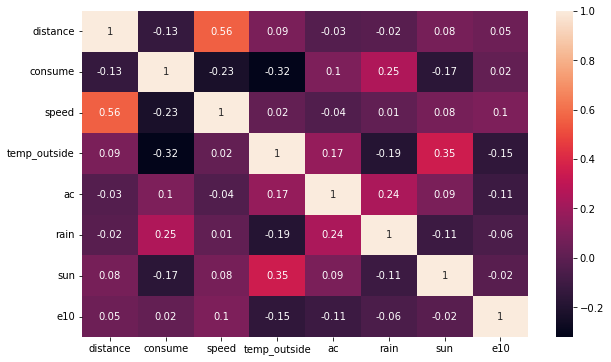

In [834]:
corr_matrix = round(df.corr(),2)
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [835]:
display(df.groupby(['e10'])['consume'].mean())

e10
0    4.899123
1    4.931250
Name: consume, dtype: float64

In [836]:
df.groupby(['e10'])['consume'].mean()[1]/df.groupby(['e10'])['consume'].mean()[0]

1.006557743957028

## Conclusion 1

In average with E10 the consumption is 1% higher.
There seems to be hardly any correlation between type of fuel and consumption.
But let's take a look if the pictures changes when we look at specific factors that could influence the consumption.

## Plots & Avg fuel consumptions (based on different factors)

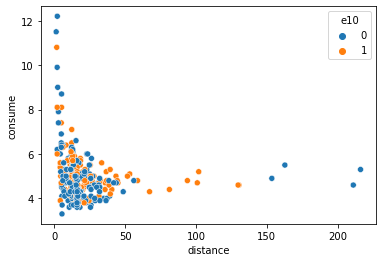

e10  distance
0    1.3         11.50
     2.0          8.05
     2.1         12.20
     2.4          9.00
     2.9          7.65
                 ...  
1    93.9         4.80
     100.9        4.70
     101.9        5.20
     129.7        4.60
     130.3        4.60
Name: consume, Length: 211, dtype: float64

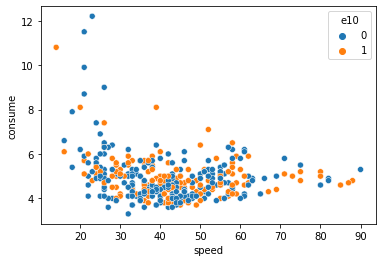

e10  speed
0    16       6.600
     18       6.650
     20       6.200
     21       9.000
     22       4.825
              ...  
1    75       5.000
     80       5.100
     85       4.600
     87       4.700
     88       4.800
Name: consume, Length: 105, dtype: float64

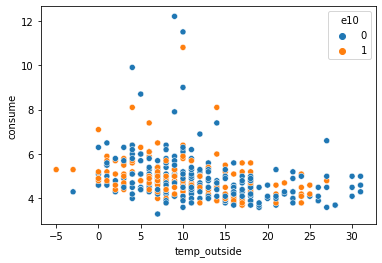

e10  temp_outside
0    -3              4.300000
      0              5.333333
      1              5.450000
      2              4.966667
      3              5.083333
      4              5.627273
      5              5.544444
      6              5.045455
      7              4.892857
      8              4.988889
      9              6.036364
      10             5.523529
      11             4.826667
      12             5.000000
      13             4.690000
      14             5.000000
      15             4.400000
      16             4.400000
      17             4.422222
      18             4.372727
      19             3.840000
      20             4.233333
      21             4.240000
      22             4.250000
      23             4.357143
      24             4.550000
      25             4.100000
      26             4.100000
      27             4.925000
      28             3.700000
      30             4.533333
      31             4.633333
1    -5              5

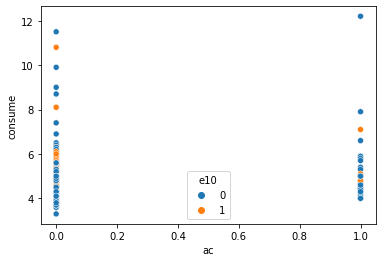

e10  ac
0    0     4.854146
     1     5.300000
1    0     4.922876
     1     5.114286
Name: consume, dtype: float64

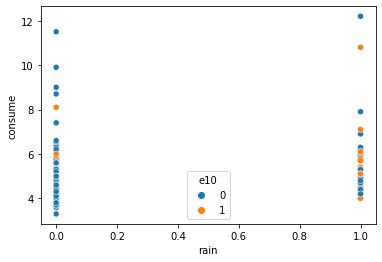

e10  rain
0    0       4.786224
     1       5.590625
1    0       4.856944
     1       5.600000
Name: consume, dtype: float64

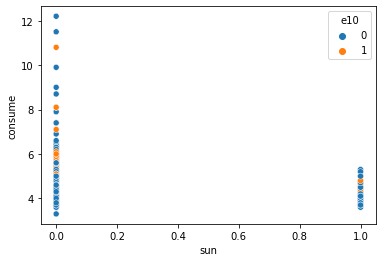

e10  sun
0    0      4.960096
     1      4.265000
1    0      4.972297
     1      4.425000
Name: consume, dtype: float64

In [837]:
for col in df.columns:    
    if col == 'e10' or col == 'consume': continue
    sns.scatterplot(x=df[col], y=df.consume, hue=df['e10'])
    plt.show()    
    display(df.groupby(['e10', col])['consume'].mean())

## Closer look at the influence of the temperature

In [838]:
df.temp_outside.describe()

count    388.000000
mean      11.358247
std        6.991542
min       -5.000000
25%        7.000000
50%       10.000000
75%       16.000000
max       31.000000
Name: temp_outside, dtype: float64

In [839]:
conditions = [
    (df['temp_outside'] < 2),
    (df['temp_outside'] >= 2) & (df['temp_outside'] < 14),
    (df['temp_outside'] >= 14) & (df['temp_outside'] < 20),    
    (df['temp_outside'] >= 20)
]

values = ['freezing', 'cold', 'moderate', 'warm']

df['temp_cat'] = np.select(conditions, values)

In [840]:
df

,distance,consume,speed,temp_outside,ac,rain,sun,e10,temp_cat
0,28.0,5.0,26,12,0,0,0,1,cold
1,12.0,4.2,30,13,0,0,0,1,cold
2,11.2,5.5,38,15,0,0,0,1,moderate
3,12.9,3.9,36,14,0,0,0,1,moderate
4,18.5,4.5,46,15,0,0,0,1,moderate
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,18,0,0,0,0,moderate
384,16.1,4.3,38,31,1,0,0,0,warm
385,16.0,3.8,45,19,0,0,0,0,moderate
386,15.4,4.6,42,31,1,0,0,0,warm


In [841]:
display(df.groupby(['e10', 'temp_cat'])['consume'].mean())

e10  temp_cat
0    cold        5.192481
     freezing    5.300000
     moderate    4.414286
     warm        4.363889
1    cold        5.075758
     freezing    5.278571
     moderate    4.588235
     warm        4.353846
Name: consume, dtype: float64

In [842]:
df.groupby(['e10', 'temp_cat'])['consume'].mean()[1]/df.groupby(['e10', 'temp_cat'])['consume'].mean()[0]

temp_cat
cold        0.977521
freezing    0.995957
moderate    1.039406
warm        0.997699
Name: consume, dtype: float64

## Conclusion 2

As before the difference is about 1% in average and that doesn't seem to depdent on the other factors 

# Regression

We have too little data to make the result meaningful and the heatmap already shows that it's unlikely that we will get new insights. But let's prepare the model so we can use it when we get more data.


In [843]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [844]:
df.drop(['temp_cat'], axis=1, inplace=True)

In [845]:
df

,distance,consume,speed,temp_outside,ac,rain,sun,e10
0,28.0,5.0,26,12,0,0,0,1
1,12.0,4.2,30,13,0,0,0,1
2,11.2,5.5,38,15,0,0,0,1
3,12.9,3.9,36,14,0,0,0,1
4,18.5,4.5,46,15,0,0,0,1
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,18,0,0,0,0
384,16.1,4.3,38,31,1,0,0,0
385,16.0,3.8,45,19,0,0,0,0
386,15.4,4.6,42,31,1,0,0,0


In [846]:
X = df.drop('e10', axis=1)
y = df['e10']

In [847]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [848]:
X_train

,distance,consume,speed,temp_outside,ac,rain,sun
287,28.8,3.9,35,15,0,0,1
56,11.8,4.9,24,7,0,0,0
8,4.9,6.4,26,4,0,0,0
313,11.3,4.3,38,17,0,0,0
134,4.2,6.0,26,5,0,0,0
...,...,...,...,...,...,...,...
323,16.5,4.0,48,15,0,0,0
192,12.1,4.2,43,4,0,0,0
117,22.9,6.0,42,4,0,1,0
47,16.0,4.9,25,8,0,0,0


In [849]:
transformer = MinMaxScaler().fit(X_train) # need to keep transformer
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train.columns

transformer = MinMaxScaler().fit(X_test) # need to keep transformer
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.columns = X_test.columns

In [850]:
X_train = X_train_norm
X_test = X_test_norm

In [851]:
LR = LinearRegression().fit(X_train,y_train)
score = LR.score(X_test, y_test)
y_pred = LR.predict(X_test)

In [855]:
print(round(score, 4))

0.175


# Final conclusion

The first impression was correct. With E10, consumption is minimally higher (~1%). 
Other factors, such as the weather, play a much greater role and can cause consumption to fluctuate way more than the fuel